<a href="https://colab.research.google.com/github/lazarstanarevic/Detecting-signal-transmitter/blob/main/Receving_signal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Molim Vas, unesite broj mesta sa kojih je moguce poslati signal:4


Molim Vas, unesite apriornu verovatnocu za mesto X0 = 0.25
Molim Vas, unesite apriornu verovatnocu za mesto X1 = 0.25
Molim Vas, unesite apriornu verovatnocu za mesto X2 = 0.25
Molim Vas, unesite apriornu verovatnocu za mesto X3 = 0.25


Molim Vas, unesite frekvenciju pojave jedinica za mesto X0 = 0.1
Molim Vas, unesite frekvenciju pojave jedinica za mesto X1 = 0.3
Molim Vas, unesite frekvenciju pojave jedinica za mesto X2 = 0.5
Molim Vas, unesite frekvenciju pojave jedinica za mesto X3 = 0.7

Automatksa vrednost za ucestalost jedinica u prijemnom signalu je 0.5 .
Ukoliko ne zelite da promenite ovu vrednost unestite nulu, u suprotnom unesite zeljenu verovatnocu za generisanje jedinica:0.35
0.35

Broj potrebnih iteracija je 5.

Signal je poslat sa lokacije X1. 



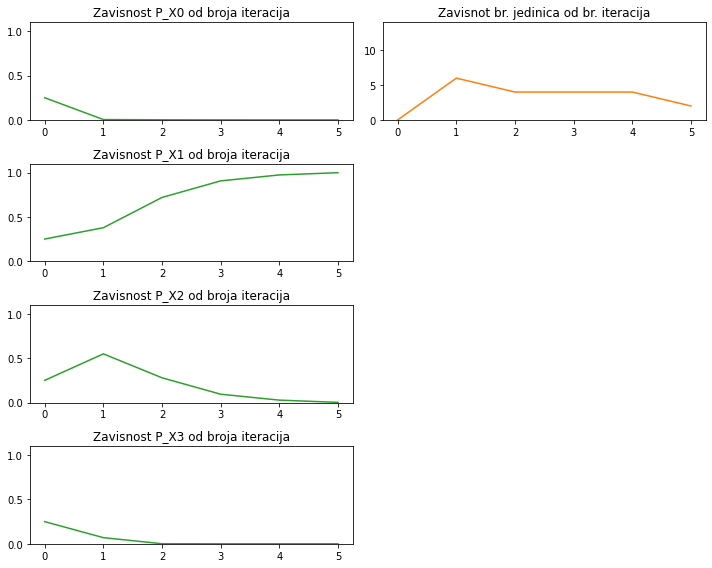

In [ ]:
import numpy as np
import math
from matplotlib import pyplot as plt

from math import factorial as fact

def binomni(a,b):
    return (fact(a) // fact(b)) // fact(a-b)

def generator_binarnog_niza(duzina, vrv):
  niz = np.random.uniform(0.0, 1.0, duzina)

  brojac_jedinica = 0

  for x in niz:
    if(x < vrv):
      brojac_jedinica+=1

  #brojac_jedinica = ((niz[0]*10)//1)%10

  return brojac_jedinica

n=int( input("Molim Vas, unesite broj mesta sa kojih je moguce poslati signal:"))

#apriorne verovatnoce za dogadjaje X0, X1, ... , Xn
P_X = []
print("\n")
for i in range(0,n):
  elem = float(input("Molim Vas, unesite apriornu verovatnocu za mesto X{} = ".format(i)))
  P_X.append(elem)

#aposteriorne verovatnoce za dogadjaje X0, X1, ... , Xn
P_XD = [0.0] * n

#verovatnoca da se dogodio D pod uslovom da se desio Xi
P_DX = [0.0] * n

#verovatnoca za jednice u dogadjajima X0, X1, ... , Xn
P_one_X = []
print("\n")
for i in range(0,n):
  elem = float(input("Molim Vas, unesite frekvenciju pojave jedinica za mesto X{} = ".format(i)))
  P_one_X.append(elem)

#verovatnova za dogadjaj D
P_D = 0.0

#brojac interacija
br=0

#srazmerno tome koliko smo povecali broj lokacija sa kojih se salje povecavamo i velicinu uzorka
duzina_niza = (math.ceil( n * 10 / 3 ))//1

br_jedn = [ 0 ]

X = [ 0 ]

Y_X = []
for i in range(0,n):
  Y_X.append( [ P_X[i] ] )

print("\nAutomatksa vrednost za ucestalost jedinica u prijemnom signalu je 0.5 .")
ver=float(input("Ukoliko ne zelite da promenite ovu vrednost unestite nulu, u suprotnom unesite zeljenu verovatnocu za generisanje jedinica:"))

if( (ver-0.0) < 1e-5 ):
  ver=0.5


while( True ):

  br = br + 1
  X.append(br)

  #D dogadjaj u kom je bilo broj_jedinica jedinica u nizu od duzina_niza karaktera
  broj_jedinica = generator_binarnog_niza(duzina_niza, ver)
  br_jedn.append(broj_jedinica)

  #verovatnoca da se ispuni D pri uslovu da se ispunio dogadjaj Xi
  for i in range (0, n):
    P_DX[i] = binomni(duzina_niza, broj_jedinica) * pow(P_one_X[i], broj_jedinica) * pow(1.0- P_one_X[i], duzina_niza - broj_jedinica)

  #verovatnoca da se D ostvario
  P_D = 0.0
  for i in range (0, n):
    P_D = P_D + P_X[i] * P_DX[i]

  #racunanje aposteriornih verovatnoca
  for i in range (0, n):
    P_XD[i] = P_X[i] * P_DX[i] / P_D

  #aposteriorne postaju apriorne
  for i in range (0, n):
    P_X[i] = P_XD[i]
    Y_X[i].append(P_X[i])

  #proveravamo da li smo ispunili uslov prekida
  #tj. da li je neka od verovatnoca P(Xi) > 0.99
  ok=True
  for i in range (0,n):
    if(P_X[i] > 0.99):
      ok = False
      break

  if(ok == False):
    break

#---------------------------------------------------------------------------

print(ver)
print("\nBroj potrebnih iteracija je {}.\n".format(br))

for i in range (0, n):
    if( P_X[i] > 0.99 ):
      print("Signal je poslat sa lokacije X{}. \n".format(i))
      break

#sada se to sve graficki pravi
plt.figure(figsize=(10, 8))


plt.subplot(n, 2, 2)
plt.plot(X, br_jedn, 'tab:orange')
plt.title('Zavisnot br. jedinica od br. iteracija')
plt.ylim(0, duzina_niza)

for i in range(0,n):
  plt.subplot(n, 2, 2*i + 1)
  plt.plot(X, Y_X[i], 'tab:green')
  plt.title("Zavisnost P_X{} od broja iteracija".format(i))
  plt.ylim(0.0,1.1)

plt.tight_layout()
plt.show()